<a href="https://colab.research.google.com/github/Inderjeetkaur747/Deep_learning/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, models, layers
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#🔹 What these do:
#Sequential: A linear stack of layers (layer-by-layer model).

# Conv2D: 2D convolution layer to extract features (edges, textures).

# MaxPooling2D: Reduces size (downsampling), helps generalization.

# Flatten: Converts 2D feature maps into 1D vector (before Dense layers).

# Dense: Fully connected layer (used for classification).

# Dropout: Randomly drops neurons to prevent overfitting.

# cifar10: Loads the CIFAR-10 dataset.

# to_categorical: Converts labels to one-hot format (needed for softmax output).

In [ ]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [ ]:
X_test.shape

(10000, 32, 32, 3)

In [ ]:
# plt.figure(figsize=(10,2))
# plt.imshow(x_train[1])

In [ ]:
X_train = X_train/255.0
X_test = X_test/ 255.0

In [ ]:
# y_train = to_categorical(y_train)
# y_test = to_categorical(y_test)

In [ ]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [ ]:
y_train = y_train.reshape(-1)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
y_test = y_test.reshape(-1)

In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [ ]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])


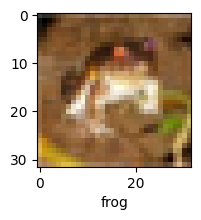

In [ ]:
plot_sample(X_train, y_train, 0)

In [ ]:
cnn = Sequential([
    Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32,32,3)),
    MaxPooling2D((2,2)),
    Conv2D(64,(3,3), activation = 'relu', padding = 'same'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(12, activation = 'relu'),
    # Dense(10, activation = 'softmax'),
    Dropout(0.2),
    Dense(10, activation='softmax')

])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
cnn.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics= ['accuracy'])

In [ ]:
cnn.fit(X_train, y_train,epochs = 10, batch_size = 64, validation_data = (X_test, y_test))

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 78s 97ms/step - accuracy: 0.4851 - loss: 1.4061 - val_accuracy: 0.5703 - val_loss: 1.2157
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 78s 93ms/step - accuracy: 0.4903 - loss: 1.3880 - val_accuracy: 0.5772 - val_loss: 1.2107
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 73s 94ms/step - accuracy: 0.5021 - loss: 1.3650 - val_accuracy: 0.5645 - val_loss: 1.2351
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 74s 94ms/step - accuracy: 0.5040 - loss: 1.3557 - val_accuracy: 0.5874 - val_loss: 1.1902
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 84s 108ms/step - accuracy: 0.5041 - loss: 1.3537 - val_accuracy: 0.5831 - val_loss: 1.2441
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 131s 94ms/step - accuracy: 0.5141 - loss: 1.3395 - val_accuracy: 0.5801 - val_loss: 1.1844
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 84s 96ms/step - accuracy: 0.5205 - loss: 1.3206 - val_accuracy: 0.5844 - val_loss: 1.2285
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 77s 98ms/step - accuracy: 0.5206 - loss: 1.3160 

In [ ]:
cnn.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.5955 - loss: 1.1870


[1.193418025970459, 0.5952000021934509]

In [ ]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step


array([[1.8188873e-02, 5.1508192e-02, 1.1272290e-01, 2.8078395e-01,
        6.6629186e-02, 2.4107760e-01, 6.0679737e-02, 5.8905430e-02,
        6.3035391e-02, 4.6468705e-02],
       [5.3660132e-02, 3.2596216e-01, 2.6842244e-07, 4.6613322e-09,
        1.7042029e-11, 2.0567334e-13, 1.1613860e-10, 1.4714921e-12,
        6.0972452e-01, 1.0652988e-02],
       [1.4221525e-01, 3.0067566e-01, 2.2614466e-03, 1.0520385e-03,
        6.0843751e-05, 2.3764122e-05, 9.6365293e-05, 4.9252380e-05,
        3.3558777e-01, 2.1797760e-01],
       [4.5536977e-01, 2.9217506e-02, 1.9329160e-05, 3.4347334e-08,
        2.3461735e-09, 1.1795932e-12, 5.5350053e-09, 2.1813133e-12,
        5.1520348e-01, 1.8987351e-04],
       [1.5035442e-02, 2.2223975e-04, 1.7543869e-01, 5.2376155e-02,
        1.4396432e-01, 1.2082738e-02, 5.9778208e-01, 9.9423039e-04,
        2.0782754e-03, 2.5812315e-05]], dtype=float32)

In [ ]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[np.int64(3), np.int64(8), np.int64(8), np.int64(8), np.int64(6)]

In [ ]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

TypeError: only integer scalar arrays can be converted to a scalar index

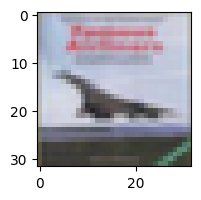

In [ ]:
plot_sample(X_test, y_test,3)

In [ ]:
classes[y_classes[3]]

'ship'